In [2]:
##Importazione Librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
##Caricamento e Pulizia Dati
df = pd.read_csv("Student_Performance.csv")
print(df.head())
print(df.columns)
df.columns = df.columns.str.strip()

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


In [5]:
## Selezione delle Variabili
X = df[['Hours Studied', 'Sleep Hours']]
y = df['Performance Index']

In [6]:
##Suddivisione Train/Test + Addestramento Modello
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
## Metriche di Valutazione
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred))
print("R² Score (coeff. determinazione): %.2f" % r2_score(y_test, y_pred))

Mean Squared Error: 322.80
R² Score (coeff. determinazione): 0.14


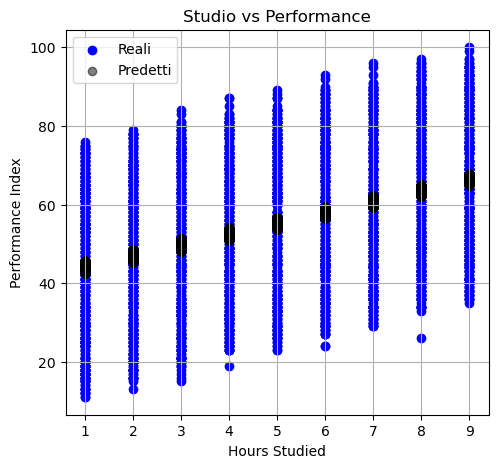

In [8]:
##Visualizzazione Dati (Scatter Plot)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test['Hours Studied'], y_test, color='blue', label='Reali')
plt.scatter(X_test['Hours Studied'], y_pred, color='black', alpha=0.5, label='Predetti')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Studio vs Performance')
plt.legend()
plt.grid(True)

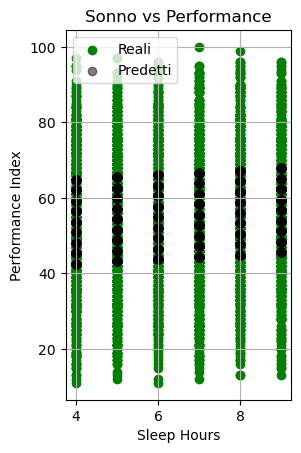

In [9]:
plt.subplot(1, 2, 2)
plt.scatter(X_test['Sleep Hours'], y_test, color='green', label='Reali')
plt.scatter(X_test['Sleep Hours'], y_pred, color='black', alpha=0.5, label='Predetti')
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.title('Sonno vs Performance')
plt.legend()
plt.grid(True)

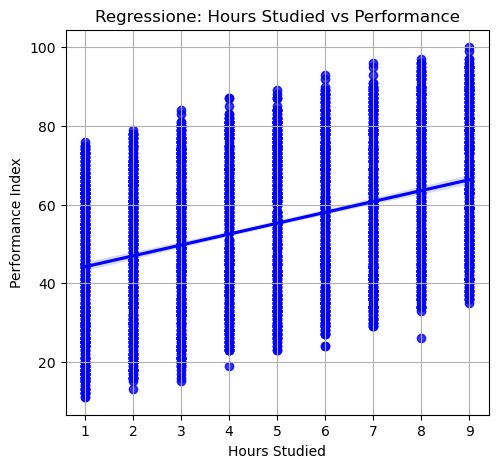

In [10]:
##Visualizzazione Linee di Regressione
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.regplot(x=X_test['Hours Studied'], y=y_test, color='blue')
plt.title('Regressione: Hours Studied vs Performance')
plt.grid(True)

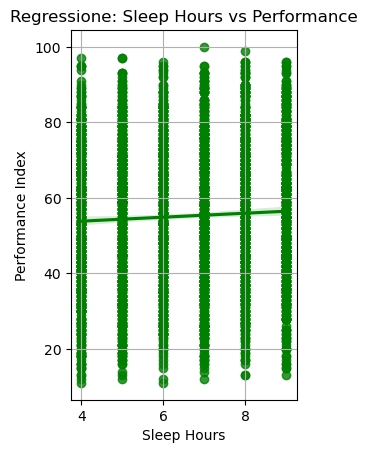

In [11]:
plt.subplot(1, 2, 2)
sns.regplot(x=X_test['Sleep Hours'], y=y_test, color='green')
plt.title('Regressione: Sleep Hours vs Performance')
plt.grid(True)